In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix , accuracy_score

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [62]:
data=pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Data Overview: 

In [63]:
data.shape

(18249, 14)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [65]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [66]:
data.describe(include='all')


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2016-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,HarrisburgScranton
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Exploratory Data Analysis


In [67]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [68]:
data.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

From the data we have four years of data, we can use different years for analysis.
we can divide our whole dataset into Organic and Conventional types.

3.1. Type of Avocado vs Average Price

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

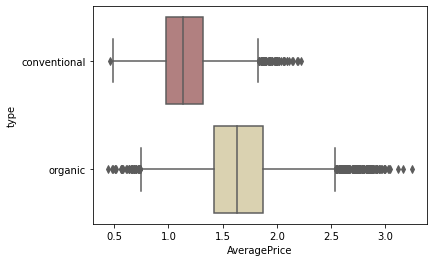

In [69]:
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'pink')

From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit.

In [70]:
label = LabelEncoder()
dicts = {}

label.fit(data.type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.type = label.transform(data.type)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

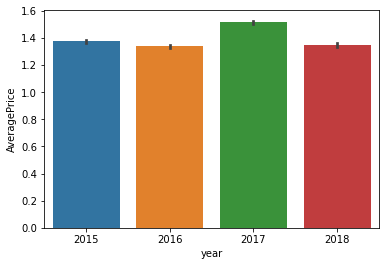

In [71]:
sns.barplot(x = "year" , y = "AveragePrice" , data=data )

From the above graph we are able to compare the average price with the different years


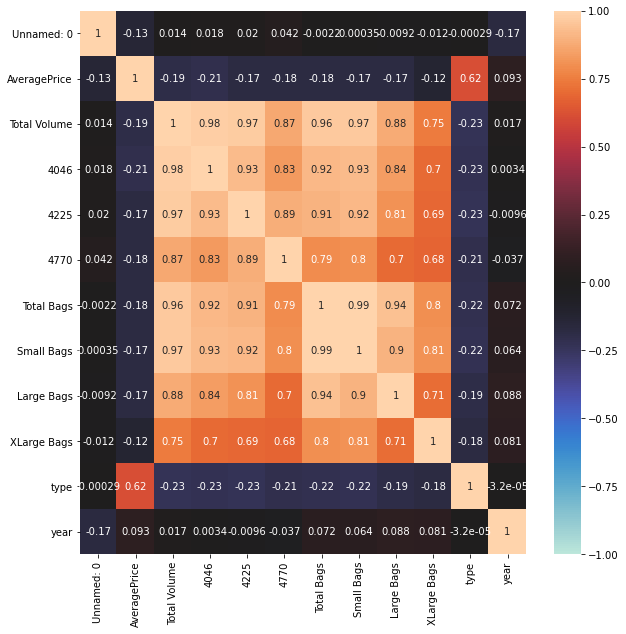

In [72]:
corr = data.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True,)

We can see there is a strong relation between TotalBags and TotalVolume ie, 0.96 and also Type and AveragePrice ie, 0.62.
Other than that there is weak realation.

Comparison : Total Volume vs Small Bags, Large Bags and XLarge Bags

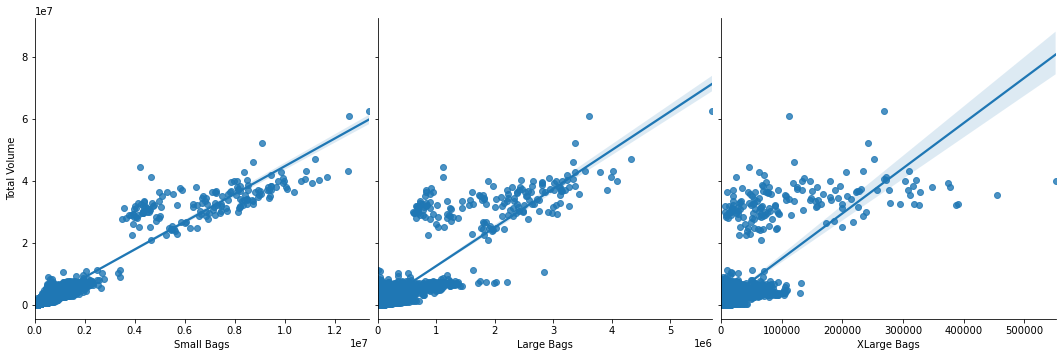

In [73]:
sns.pairplot(data, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

Total Bags vs Small Bags, Large Bags and XLarge Bags

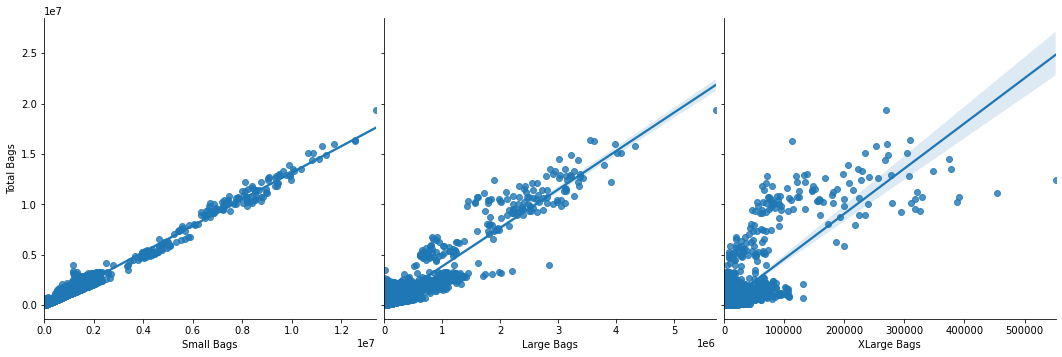

In [74]:
sns.pairplot(data, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

There is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags.
We can say weak co-relation between TotalVolume Vs XLarge and TotalBags Vs XLargeBags.
Large and LargeBags comes in the middle.

3.4. Region Vs Year distribution
From the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

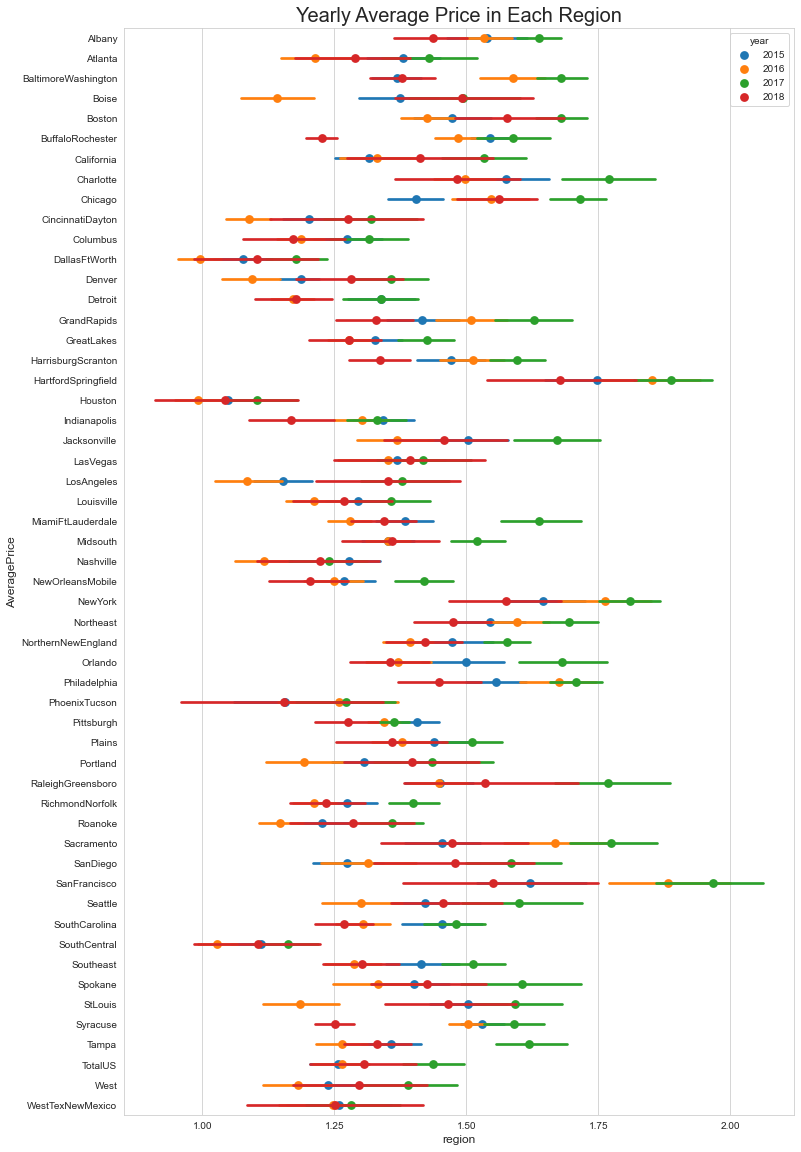

In [75]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Region Vs AveragePrice distribution

From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.
For Conventional Type we have an average price < 1.50$.

Text(0.5, 1.0, 'Type Average Price in Each Region')

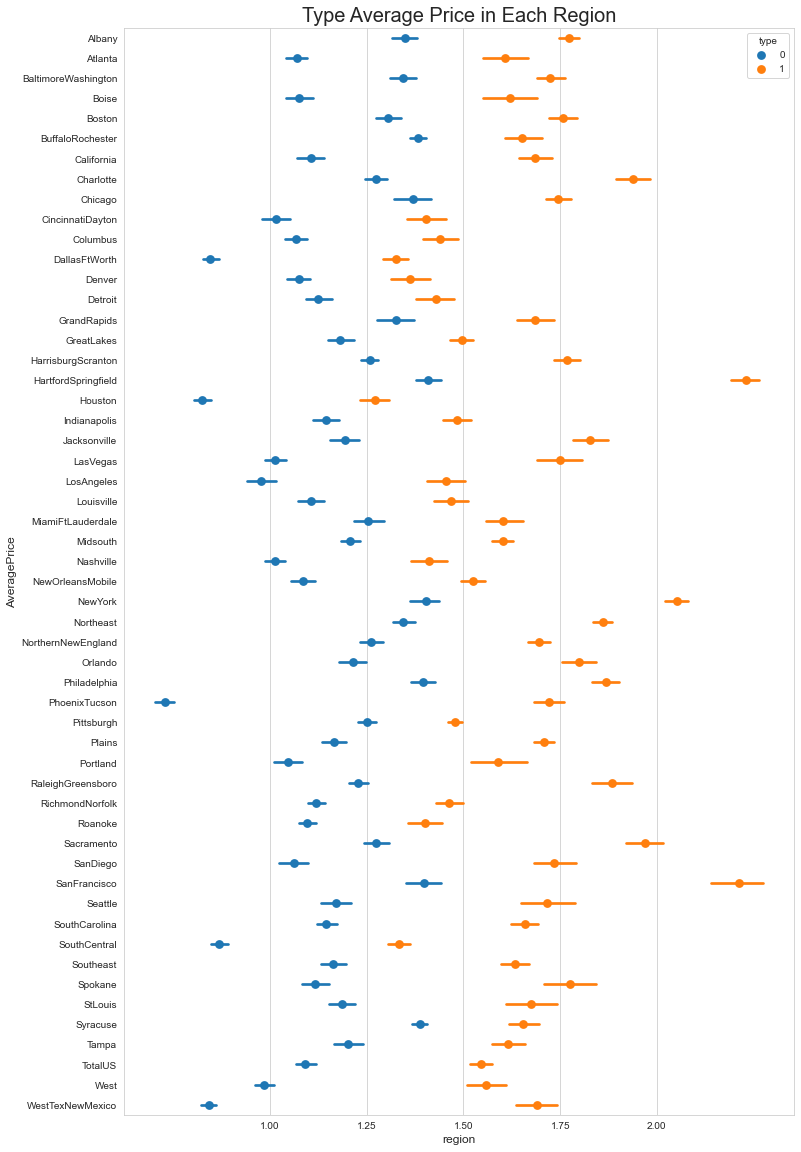

In [76]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

Classifying Type of Avocado

Using Logistic Regression

In [77]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['AveragePrice','Date'])
y = data[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18249, 12)
(18249, 1)


In [78]:
X=data[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=data.type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


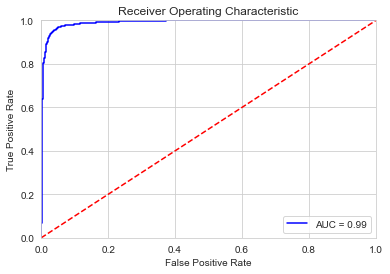

In [79]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  
#Acuuracy score
print("Accuracy score for Logistic Regression test data is:", accuracy_score(y_test, y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using Random forest classifier

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798
----------------------------------------------------------------------------------------


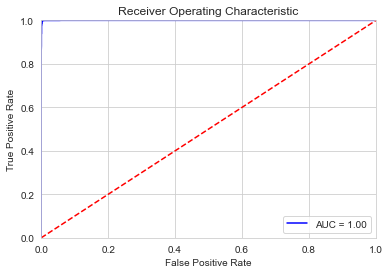

In [80]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Predicting Average Price of Avocado

In [98]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [99]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [100]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [101]:
linreg = linear_reg(X,y)

In [102]:
linreg.score(X,y)

0.4005117493849015

In [104]:
y_pred_train = linreg.predict(X_train)

In [105]:
y_pred_test = linreg.predict(X_test)

In [106]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.3315783271089188
MAE for test set is 0.3305240494909588
----------------------------------------------------------------------------------------
MSE for training set is 0.14997406206966252
MSE for test set is 0.14946407268497808
----------------------------------------------------------------------------------------
RMSE for training set is 0.3872648474489552
RMSE for test set is 0.3866058363307234


If we compare RMSE and MSE value, we can conclude that RMSE is greater than MSE

Conclusion

Columns like Type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.
Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
Random forest classifier model predicts the type of Avocado more accurately than Logistic regression model.
Random Forest Regressor model predicts the average price more accurately than linear regression model.